### Antoine Levrier
*PHEIGES, all-cell-free phage synthesis and selection from engineered genomes*

# Importing necessary libraries

In [13]:
#import packages for plotting:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics

from Bio import AlignIO

from matplotlib.colors import ListedColormap
import matplotlib as mpl
from matplotlib.patches import Rectangle
import seaborn as sns

import plotly
import plotly.express as px
import plotly.graph_objects as go

### this script takes in entry an alignment file of all the phage variants on the T7 reference sequence.

In [20]:
##to abtain rfaC, rfaE, rfaD and rfaG run this script by replacing 'alignment-lpcA.fasta' by 'alignment-rfaC.fasta', 'alignment-rfaE.fasta', 'alignment-rfaD.fasta', 'alignment-rfaG.fasta'.
align = AlignIO.read("alignment-lpcA.fasta", "fasta")
print(align)

#replace 147-663 (DNA positions of the tip of the tail fiber)
consensus = align[0].seq[147:663]
seq_length=len(consensus)
consensus_aa=consensus.translate()

Alignment with 13 rows and 916 columns
gttcaacgtagagagtggacaacagcgataggcggtaacatcca...aat template
GTTCAACGTAGAGAGTGGACAACAGCGATAGGCGGTAACATCCA...AAT A9
GTTCAACGTAGAGAGTGGACAACAGCGATAGGCGGTAACATCCA...AAT A2
GTTCAACGTAGAGAGTGGACAACAGCGATAGGCGGTAACATCCA...AAT A7
GTTCAACGTAGAGAGTGGACAACAGCGATAGGCGGTAACATCCA...AAT A5
GTTCAACGTAGAGAGTGGACAACAGCGATAGGCGGTAACATCCA...AAT A4
GTTCAACGTAGAGAGTGGACAACAGCGATAGGCGGTAACATCCA...AAT A10
GTTCAACGTAGAGAGTGGACAACAGCGATAGGCGGTAACATCCA...AAT A13
GTTCAACGTAGAGAGTGGACAACAGCGATAGGCGGTAACATCCA...AAT A1
GTTCAACGTAGAGAGTGGACAACAGCGATAGGCGGTAACATCCA...AAT A6
GTTCAACGTAGAGAGTGGACAACAGCGATAGGCGGTAACATCCA...AAT A3
GTTCAACGTAGAGAGTGGACAACAGCGATAGGCGGTAACATCCA...AAT A11
GTTCAACGTAGAGAGTGGACAACAGCGATAGGCGGTAACATCCA...AAT A8


### determine if DNA mutation leads to silent mutation.

In [21]:
#for all phage variants, at each nucleotide position, look if there is a mutation compared to the reference sequence. Then look if this mutation is silent (identical amino acid residue) or not.

binarize_align=[]
for record in align[1:]:
    record_aa = record.seq[147:663].translate()
    binarize_seq=[]
    position = 0
    position_aa = 0
    #replace 147:663 (tip of tail fiber position)
    for x in record.seq[147:663]:
        if x == consensus[position].upper():
            binarize_seq.append(0)
        else:
            if record_aa[int(position_aa)] == consensus_aa[int(position_aa)]:
                binarize_seq.append(1)
                #1 if silent mutation
            else:
                binarize_seq.append(2)
                #2 if non silent mutation

        position+=1
        position_aa+=1/3+0.0000001
        
    binarize_align.append(binarize_seq)

#print(binarize_align)
#print(len(binarize_align[0]))
#print(binarize_align[0])

### Fig. 4d and Supplementary Figure 25 : Plot the mutation landscape for each variant set.

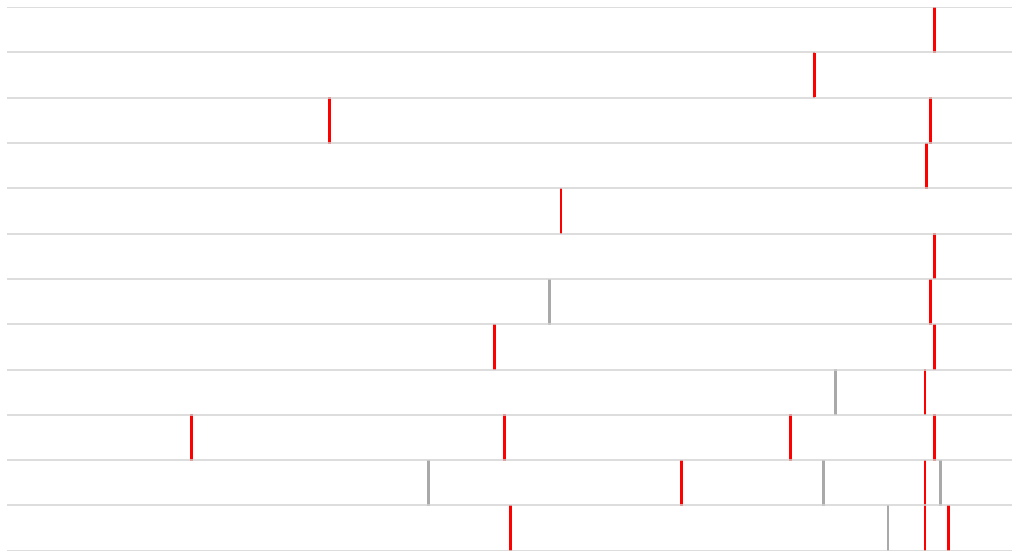

In [22]:
# Plot the mutations observe for each variant of the set. Silent mutations are represented in grey and different residue in red.

fig, ax = plt.subplots(figsize=(18,10))
cmap= mpl.colors.ListedColormap(['#FF000000', 'darkgray','red'])
#labels = ['no mutation', 'silent mutation', 'mutation']

phage=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
heatmap = sns.heatmap(binarize_align, cmap = cmap, xticklabels=False, yticklabels=False, cbar=False)
ax.hlines([x for x in range(13)], *ax.get_xlim(), color='lightgray')

#un-comment to display the external loops of the tip of the tail fiber.
#ax.add_patch(Rectangle((279, 0), 15, 12, edgecolor='lightblue', facecolor='none', lw=4, alpha=0.6))
#ax.add_patch(Rectangle((348, 0), 15, 12, edgecolor='lightblue', facecolor='none', lw=4, alpha=0.6))
#ax.add_patch(Rectangle((405, 0), 15, 12, edgecolor='lightblue', facecolor='none', lw=4, alpha=0.6))
#ax.add_patch(Rectangle((477, 0), 12, 12, edgecolor='lightblue', facecolor='none', lw=4, alpha=0.6))

#plt.savefig("4c rfaE.svg", format='svg')

### Supplementary Figure 25 : Retrive the mutations observed and display as a table.

In [23]:
#get the translation for each sequence in align and create a compile_records list of list with all the amino acid mutations.

template_aa=align[0].seq.translate()

#sequence of interest in the tail fiber: AHYI...VENE* 171 AAs, 516bp
length_aa=len(template_aa)

compiled_records = []
for record in align[1:]:
    record.id=[]
    for x in range (length_aa):
        if record.seq.translate()[x] == template_aa[x]:
            record.id.append(0)
        else:
            record.id.append(str(template_aa[x]) +str(x+334)+ str(record.seq.translate()[x]))
    compiled_records.append(record.id[49:221])
#print('compiled records are : \n', compiled_records)

/Users/Maczang/.pyenv/versions/3.7.7/lib/python3.7/site-packages/Bio/Seq.py:2808: BiopythonWarning:

Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.



In [24]:
#create a list with all the positions where there is at least on mutation and get the mutation, the variant and the residue position.
mut_positions=[]
record_num=0
for record in compiled_records:
    position=0
    for aa in record:
        if aa == 0:
            pass
        else:
            mut_positions.append([aa,record_num, position])
        position+=1
    record_num+=1
#print(mut_positions)

In [25]:
#make a list of the positions were at least one mutation is found in all the records
alo_mut=[]
for mutation in mut_positions:
    #print(mutation[2])
    alo_mut.append(mutation[2])
#print('redundant are', alo_mut)

#remove redundant positions
alo_mut_2=[*set(alo_mut)]

#sort the positions at least once (alo)
alo_mut_2.sort()
#print('non redudant positions are ', alo_mut_2)
#print('the size of the array is ', len(alo_mut_2))

In [26]:
#create a list of list (L) that contains for each variant the mutations observed, sorted from left to right of the sequence. 
L=[]
for record in compiled_records:
    l=[]
    for x in alo_mut_2:
        #print(record[x])
        l.append(record[x])
    L.append(l)

alo_consensus_aa = []
for x in alo_mut_2:
    alo_consensus_aa.append(str(consensus_aa[x]) + str(x+383))
#print(alo_consensus_aa)
L.append(alo_consensus_aa)
#print(L)

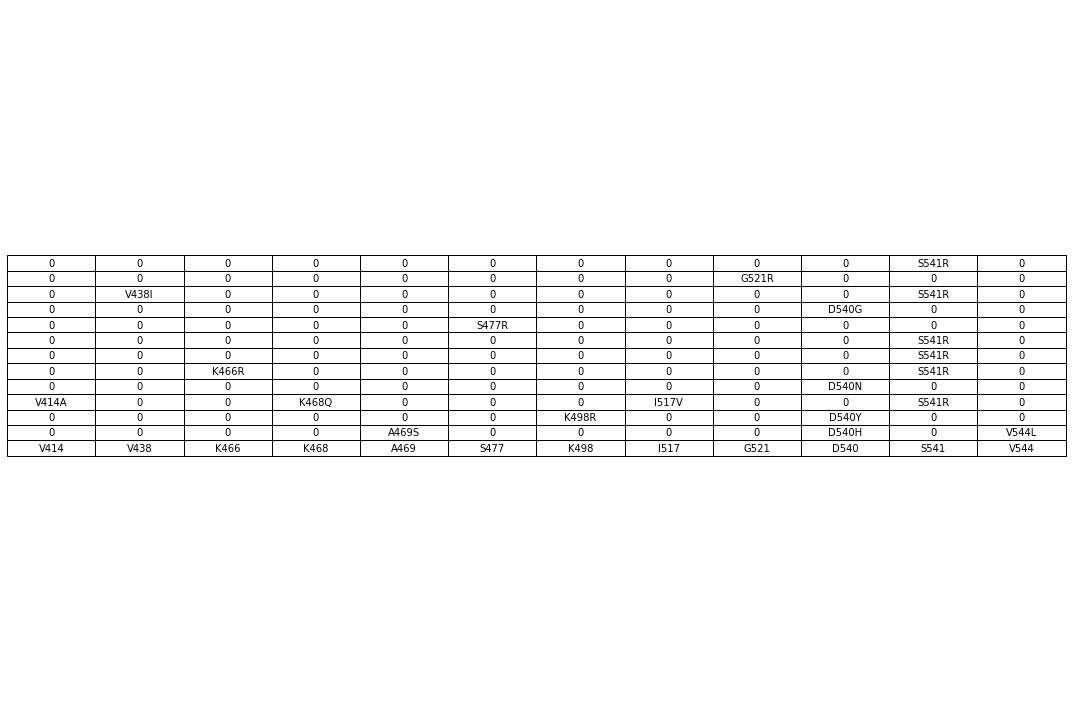

In [27]:
#plot the table of the mutations as a table with in lign the phage variant and in column the mutation ordered from left to right in the sequence.
df=pd.DataFrame(L)
#df.head()

fig, ax = plt.subplots(figsize=(15,10))

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df.values, cellLoc='center', loc='center', fontsize=30)

fig.tight_layout()
#plt.savefig('table_G.png')
plt.show()

### Fig. 6.e : create a heatmap compiling the mutated residues observed in the variants set of lpcA, rfaE and rfaC. 

In [29]:
#for lpcA, rfaE and rfaC all the positions where a mutation and the number of time this mutation is found were manually retrieved using above.
#all_positions=[N395, N404, V414, V438, R460, S462, K466, K468, A469, S477, G480, K498, A500, N501, I517, G521, D540, S541, V544]
#count=[1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 1, 4, 5, 21, 1]


fig = go.Figure(data=go.Heatmap(
    z=[[1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 1, 4, 5, 21, 1]],
    x=['N395', 'N404', 'V414', 'V438', 'R460', 'S462', 'K466', 'K468', 'A469', 'S477', 'G480', 'K498', 'A500', 'N501', 'I517', 'G521', 'D540', 'S541', 'V544'],
    y=[''],
    text=[['S', 'K', 'A', 'I', 'C', 'G', 'R', 'Q-R', 'S', 'R', 'S-R', 'R', 'S', 'K', 'V', 'R', 'G-N-Y-H', 'R', 'L']],
    texttemplate="%{text}",
    textfont={"size":10},
    hoverongaps = True,
    zmin=0,
    zmax=21,
    zmid=1,
    colorscale = 'Greys'))


fig.update_layout(showlegend = False,width = 1000, height = 250, autosize = False )

#fig.write_image("heatmap.pdf")
#fig.write_image("heatmap.svg", format='svg')
fig.show()